# Comparaisons théoriques et expérimentales

Ce notebook se portera uniquement sur les questions n°2 et n°11

In [2]:
from time import time
from random import *
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel

### Q2 :
#### Comparaison des fonctions create_network et dico_reseau

##### Théorique :

    create_network => Linéaire
    
    dico_reseau => Quadratique

##### Expérimental

In [21]:
from community_detection import *

amis = get_people(dico_reseau(lecture_reseau("files/Communaute3.csv")))

def mesure_create_network(n):
    tab = [amis[randint(0, len(amis) // 2)] for i in range(n)]
    temps = 0.
    i = 0
    while i < 100:
        depart = time()
        create_network(tab)
        temps += time()-depart
        i += 1
    return temps / 100

def mesure_dico_reseau(n):
    tab = [amis[randint(0, len(amis) // 2)] for i in range(n)]
    temps = 0.
    i = 0
    while i < 100:
        depart = time()
        dico_reseau(tab)
        temps += time()-depart
        i += 1
    return temps / 100

tailles = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000]


tps1 = []
tps2 = []
i = 0
while i < len(tailles):
    tps1.append(mesure_create_network(tailles[i]))
    tps2.append(mesure_dico_reseau(tailles[i]))
    i += 1

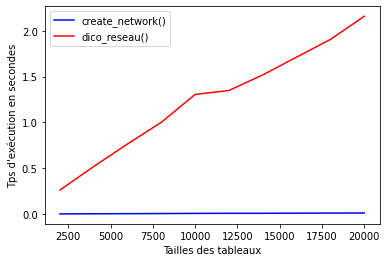

In [27]:
%matplotlib inline

plot(tailles, tps1, "b", label="create_network()")
plot(tailles, tps2, "r", label="dico_reseau()")


xlabel("Tailles des tableaux")
ylabel("Tps d'exécution en secondes")
legend()